In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
pzt = pd.read_excel('pzt2.xlsx', header=None)

pzt

,0,1,2,3,4,5,6,7,8,9,...,2961,2962,2963,2964,2965,2966,2967,2968,2969,2970
0,30000.0,162.179,162.080,162.019,162.019,162.019,162.069,162.069,162.118,162.019,...,186.107,186.107,186.163,186.051,186.051,186.265,186.321,186.265,186.051,186.016
1,30010.0,164.697,164.647,164.697,164.537,164.537,164.588,164.537,164.638,164.537,...,188.648,188.648,188.705,188.648,188.648,188.648,188.806,188.806,188.591,188.389
2,30020.0,167.906,167.906,167.906,167.957,167.906,167.957,167.906,168.009,167.744,...,191.525,191.525,191.684,191.684,191.684,191.684,191.684,191.684,191.467,191.367
3,30030.0,171.637,171.583,171.583,171.637,171.583,171.637,171.637,171.690,171.473,...,195.126,195.185,195.126,195.126,195.126,195.185,195.285,195.285,195.126,194.749
4,30040.0,174.364,174.364,174.364,174.364,174.141,174.197,174.141,174.252,174.197,...,200.095,200.033,200.095,200.095,200.095,200.095,200.254,200.095,200.033,199.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,69960.0,662.970,662.970,663.175,663.997,664.409,663.586,663.586,664.616,666.062,...,778.363,778.081,778.081,778.081,777.798,778.081,778.081,778.646,780.348,783.488
3996,69970.0,664.822,665.028,665.235,666.269,666.477,665.855,665.855,666.892,668.140,...,776.670,776.389,776.389,776.670,776.107,776.670,776.670,776.952,779.213,782.915
3997,69980.0,658.891,659.094,659.906,660.721,661.332,660.721,660.517,661.332,662.970,...,771.912,771.634,771.634,771.634,771.356,771.634,771.634,772.190,774.984,779.780
3998,69990.0,652.867,653.066,653.464,654.463,654.863,654.263,654.263,655.063,656.670,...,763.656,763.112,763.112,763.384,762.840,763.384,763.384,763.929,767.212,772.747


In [4]:
data = pzt.T

data

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
0,30000.000,30010.000,30020.000,30030.000,30040.000,30050.000,30060.000,30070.000,30080.000,30090.000,...,69910.000,69920.000,69930.000,69940.000,69950.000,69960.000,69970.000,69980.000,69990.000,70000.000
1,162.179,164.697,167.906,171.637,174.364,172.654,163.434,156.894,155.915,156.413,...,652.072,658.284,664.616,664.409,661.332,662.970,664.822,658.891,652.867,652.270
2,162.080,164.647,167.906,171.583,174.364,172.712,163.434,156.894,155.915,156.413,...,652.072,658.486,664.822,664.409,661.332,662.970,665.028,659.094,653.066,652.270
3,162.019,164.697,167.906,171.583,174.364,172.712,163.380,156.894,155.964,156.413,...,652.270,658.284,664.822,665.028,661.741,663.175,665.235,659.906,653.464,652.668
4,162.019,164.537,167.957,171.637,174.364,172.711,163.487,156.944,155.964,156.300,...,653.066,659.094,665.855,665.855,662.560,663.997,666.269,660.721,654.463,653.664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,186.265,188.648,191.684,195.185,200.095,207.909,219.236,217.125,193.262,182.750,...,788.100,789.262,786.076,784.923,779.496,778.081,776.670,771.634,763.384,750.808
2967,186.321,188.806,191.684,195.285,200.254,208.136,219.166,217.437,193.196,182.920,...,787.810,789.262,785.787,784.923,779.496,778.081,776.670,771.634,763.384,750.808
2968,186.265,188.806,191.684,195.285,200.095,208.071,219.236,217.229,193.440,182.920,...,788.390,789.552,786.364,785.211,780.064,778.646,776.952,772.190,763.929,751.599
2969,186.051,188.591,191.467,195.126,200.033,207.909,219.096,217.333,193.572,182.758,...,788.680,791.010,788.100,787.231,782.343,780.348,779.213,774.984,767.212,755.575


In [5]:
dataset_final = data.drop([0, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989], axis=0)

display(dataset_final)

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
1,162.179,164.697,167.906,171.637,174.364,172.654,163.434,156.894,155.915,156.413,...,652.072,658.284,664.616,664.409,661.332,662.970,664.822,658.891,652.867,652.270
2,162.080,164.647,167.906,171.583,174.364,172.712,163.434,156.894,155.915,156.413,...,652.072,658.486,664.822,664.409,661.332,662.970,665.028,659.094,653.066,652.270
3,162.019,164.697,167.906,171.583,174.364,172.712,163.380,156.894,155.964,156.413,...,652.270,658.284,664.822,665.028,661.741,663.175,665.235,659.906,653.464,652.668
4,162.019,164.537,167.957,171.637,174.364,172.711,163.487,156.944,155.964,156.300,...,653.066,659.094,665.855,665.855,662.560,663.997,666.269,660.721,654.463,653.664
5,162.019,164.537,167.906,171.583,174.141,172.712,163.434,156.944,155.964,156.413,...,653.464,659.500,666.062,666.269,662.970,664.409,666.477,661.332,654.863,654.063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,186.265,188.648,191.684,195.185,200.095,207.909,219.236,217.125,193.262,182.750,...,788.100,789.262,786.076,784.923,779.496,778.081,776.670,771.634,763.384,750.808
2967,186.321,188.806,191.684,195.285,200.254,208.136,219.166,217.437,193.196,182.920,...,787.810,789.262,785.787,784.923,779.496,778.081,776.670,771.634,763.384,750.808
2968,186.265,188.806,191.684,195.285,200.095,208.071,219.236,217.229,193.440,182.920,...,788.390,789.552,786.364,785.211,780.064,778.646,776.952,772.190,763.929,751.599
2969,186.051,188.591,191.467,195.126,200.033,207.909,219.096,217.333,193.572,182.758,...,788.680,791.010,788.100,787.231,782.343,780.348,779.213,774.984,767.212,755.575


In [61]:
baseline1 = dataset_final.iloc[:180]
baseline2 = dataset_final.iloc[330:500]

baseline = pd.concat([baseline1, baseline2]).reset_index(drop=True)

baseline


,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
0,162.179,164.697,167.906,171.637,174.364,172.654,163.434,156.894,155.915,156.413,...,652.072,658.284,664.616,664.409,661.332,662.970,664.822,658.891,652.867,652.270
1,162.080,164.647,167.906,171.583,174.364,172.712,163.434,156.894,155.915,156.413,...,652.072,658.486,664.822,664.409,661.332,662.970,665.028,659.094,653.066,652.270
2,162.019,164.697,167.906,171.583,174.364,172.712,163.380,156.894,155.964,156.413,...,652.270,658.284,664.822,665.028,661.741,663.175,665.235,659.906,653.464,652.668
3,162.019,164.537,167.957,171.637,174.364,172.711,163.487,156.944,155.964,156.300,...,653.066,659.094,665.855,665.855,662.560,663.997,666.269,660.721,654.463,653.664
4,162.019,164.537,167.906,171.583,174.141,172.712,163.434,156.944,155.964,156.413,...,653.464,659.500,666.062,666.269,662.970,664.409,666.477,661.332,654.863,654.063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,180.059,184.324,190.757,193.744,176.060,168.166,167.428,168.510,170.104,172.666,...,804.377,807.105,786.653,756.109,744.545,751.072,760.673,771.912,776.670,763.384
346,180.004,184.324,190.983,193.916,176.295,168.166,167.592,168.510,170.104,172.825,...,805.890,808.323,787.231,756.643,745.841,752.126,762.026,773.305,778.081,764.474
347,180.115,184.381,191.043,193.916,176.295,168.166,167.428,168.562,170.156,172.825,...,806.193,808.934,788.100,757.446,746.101,752.655,762.569,773.585,778.363,765.020
348,180.059,184.324,190.817,193.916,176.295,168.221,167.428,168.510,170.156,172.825,...,807.105,809.545,788.390,757.982,746.881,753.449,763.384,774.704,779.496,765.841


In [62]:
pca_b = PCA(n_components=350)
principalComponents_b = pca_b.fit_transform(baseline)

pca_baseline = pd.DataFrame(data= principalComponents_b)

pca_baseline

,0,1,2,3,4,5,6,7,8,9,...,340,341,342,343,344,345,346,347,348,349
0,-3521.676752,-2111.500738,-1683.802160,1370.389359,561.738754,-5.984458,-355.747398,41.207086,-6.123059,-16.251717,...,-0.236161,0.203493,0.055707,0.049969,-0.068142,0.053254,0.095923,-0.154381,0.173600,3.365645e-12
1,-3523.511934,-2109.044302,-1680.099483,1357.670172,554.732416,-9.627021,-329.278684,41.463055,-4.590342,-18.702040,...,-0.098274,0.001835,-0.002334,-0.116739,0.003099,-0.040892,0.130885,0.289195,-0.279361,3.365645e-12
2,-3527.359598,-2116.650903,-1698.454308,1403.717507,582.989624,-5.683378,-392.667145,23.738587,-54.111885,-36.581636,...,-0.237832,-0.126534,-0.096053,-0.210798,-0.024613,-0.223802,-0.000073,-0.007576,0.499735,3.365645e-12
3,-3526.488072,-2115.546591,-1698.073485,1402.524121,581.503378,-6.263065,-368.828140,14.551905,-67.744882,-49.432022,...,0.335824,0.096353,0.125363,0.275512,0.276767,0.415753,0.041253,-0.158263,-0.844298,3.365645e-12
4,-3525.615466,-2115.602597,-1700.401825,1412.059206,587.694129,-4.679930,-399.884186,17.525019,-69.995813,-47.932012,...,0.331184,-0.011925,-0.197471,-0.109959,-0.645829,-0.382433,-0.202075,0.078051,0.485769,3.365645e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,4170.770745,-2391.349810,1746.833958,798.071046,-348.603541,-181.209022,58.020074,-25.028642,-22.862665,-24.701340,...,-0.545114,-0.398270,0.035460,0.198661,0.352706,0.112645,-0.228458,0.296086,0.382373,3.365645e-12
346,4178.219374,-2396.288047,1760.429547,810.457804,-355.602916,-163.426660,76.651051,-33.954468,-32.942610,-42.568631,...,0.284820,0.053688,-0.042598,-0.285173,0.122073,0.725658,-0.164347,-0.381343,-0.140878,3.365645e-12
347,4184.600599,-2397.769198,1758.272856,804.901994,-354.199065,-165.465715,94.269740,-39.790998,-44.754804,-46.923238,...,-0.367942,-0.104924,0.004620,-0.167865,-0.091648,-0.161990,-0.141226,0.018685,-0.197313,3.365645e-12
348,4186.168907,-2397.222008,1759.026322,807.839781,-355.702626,-162.876880,101.129199,-43.502735,-48.030100,-50.920684,...,-0.174927,-0.185763,0.043000,0.148870,0.272755,-0.297139,0.452272,0.085735,0.091406,3.365645e-12


In [63]:
baseline_final = pca_baseline.assign(y=0)

baseline_final

,0,1,2,3,4,5,6,7,8,9,...,341,342,343,344,345,346,347,348,349,y
0,-3521.676752,-2111.500738,-1683.802160,1370.389359,561.738754,-5.984458,-355.747398,41.207086,-6.123059,-16.251717,...,0.203493,0.055707,0.049969,-0.068142,0.053254,0.095923,-0.154381,0.173600,3.365645e-12,0
1,-3523.511934,-2109.044302,-1680.099483,1357.670172,554.732416,-9.627021,-329.278684,41.463055,-4.590342,-18.702040,...,0.001835,-0.002334,-0.116739,0.003099,-0.040892,0.130885,0.289195,-0.279361,3.365645e-12,0
2,-3527.359598,-2116.650903,-1698.454308,1403.717507,582.989624,-5.683378,-392.667145,23.738587,-54.111885,-36.581636,...,-0.126534,-0.096053,-0.210798,-0.024613,-0.223802,-0.000073,-0.007576,0.499735,3.365645e-12,0
3,-3526.488072,-2115.546591,-1698.073485,1402.524121,581.503378,-6.263065,-368.828140,14.551905,-67.744882,-49.432022,...,0.096353,0.125363,0.275512,0.276767,0.415753,0.041253,-0.158263,-0.844298,3.365645e-12,0
4,-3525.615466,-2115.602597,-1700.401825,1412.059206,587.694129,-4.679930,-399.884186,17.525019,-69.995813,-47.932012,...,-0.011925,-0.197471,-0.109959,-0.645829,-0.382433,-0.202075,0.078051,0.485769,3.365645e-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,4170.770745,-2391.349810,1746.833958,798.071046,-348.603541,-181.209022,58.020074,-25.028642,-22.862665,-24.701340,...,-0.398270,0.035460,0.198661,0.352706,0.112645,-0.228458,0.296086,0.382373,3.365645e-12,0
346,4178.219374,-2396.288047,1760.429547,810.457804,-355.602916,-163.426660,76.651051,-33.954468,-32.942610,-42.568631,...,0.053688,-0.042598,-0.285173,0.122073,0.725658,-0.164347,-0.381343,-0.140878,3.365645e-12,0
347,4184.600599,-2397.769198,1758.272856,804.901994,-354.199065,-165.465715,94.269740,-39.790998,-44.754804,-46.923238,...,-0.104924,0.004620,-0.167865,-0.091648,-0.161990,-0.141226,0.018685,-0.197313,3.365645e-12,0
348,4186.168907,-2397.222008,1759.026322,807.839781,-355.702626,-162.876880,101.129199,-43.502735,-48.030100,-50.920684,...,-0.185763,0.043000,0.148870,0.272755,-0.297139,0.452272,0.085735,0.091406,3.365645e-12,0


In [64]:
dano1 = dataset_final.iloc[660:810]
dano2 = dataset_final.iloc[990:1190]
dano3 = dataset_final.iloc[1320:1490]
dano4 = dataset_final.iloc[1650:1820]
dano5 = dataset_final.iloc[1980:2150]
dano6 = dataset_final.iloc[2301:2461]
dano7 = dataset_final.iloc[2631:2771]

dano = pd.concat([dano1, dano2, dano3, dano4, dano5, dano6, dano7]).reset_index(drop=True)

dano

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
0,166.940,169.590,173.226,176.950,179.447,170.780,160.324,157.815,158.669,159.576,...,663.381,672.123,676.154,676.368,677.009,670.860,659.500,655.263,656.066,658.891
1,166.518,169.429,172.955,176.510,179.050,170.550,160.376,157.799,158.556,159.417,...,662.355,671.070,675.089,675.089,675.727,669.811,658.689,654.663,655.263,657.880
2,166.358,169.055,172.576,176.289,178.823,170.840,160.480,157.520,158.395,159.306,...,661.128,669.602,674.026,674.026,674.451,669.811,658.689,654.063,654.463,656.871
3,166.198,168.895,172.414,175.959,178.480,170.671,160.088,157.355,158.121,158.986,...,660.313,668.766,673.391,673.391,673.391,669.602,658.689,653.863,653.863,656.267
4,165.936,168.682,172.360,175.959,178.253,170.671,160.140,157.405,158.170,159.035,...,660.313,668.348,672.968,673.179,673.179,669.602,658.689,653.863,653.863,656.066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,165.793,168.153,170.360,172.886,175.686,179.409,184.856,193.562,203.510,191.073,...,774.144,774.704,762.026,752.391,750.020,750.545,750.545,751.072,739.405,722.204
1156,165.943,168.204,170.411,172.886,175.686,179.464,184.913,193.217,203.557,188.914,...,774.144,774.984,762.569,752.655,750.282,750.808,750.808,751.599,740.171,722.691
1157,165.893,168.153,170.360,172.834,175.845,179.464,184.696,193.217,203.415,189.161,...,774.144,774.984,762.569,752.655,750.282,750.808,750.808,751.335,740.171,722.691
1158,165.943,168.204,170.411,172.886,175.686,179.409,185.131,193.622,203.862,191.437,...,774.144,774.984,762.569,752.655,750.545,751.072,750.808,751.599,740.171,722.691


In [65]:
pca_d = PCA(n_components=350)
principalComponents_d = pca_d.fit_transform(dano)

pca_dano = pd.DataFrame(data= principalComponents_d)

pca_dano

,0,1,2,3,4,5,6,7,8,9,...,340,341,342,343,344,345,346,347,348,349
0,-3022.094515,-1707.190357,-1246.129320,1037.825741,-234.526823,764.272953,261.458239,-510.503531,-779.259583,-536.977645,...,0.934992,0.067406,0.328075,-0.163481,1.047247,0.360964,0.535569,-0.561761,0.159540,0.074562
1,-3045.565928,-1724.924936,-1277.001847,1079.559290,-272.785916,754.781814,277.026610,-494.985645,-782.363223,-529.819031,...,-0.883363,0.735237,-0.237842,-0.560431,-0.456695,0.225077,-0.500206,0.266295,-0.527766,-0.339242
2,-3061.605281,-1744.824796,-1314.162811,1138.565809,-329.336263,743.863174,304.376395,-472.834953,-784.614655,-513.345562,...,-0.019941,-0.382492,-0.283692,0.266221,-0.625787,-0.546315,-0.516436,-0.896877,0.303258,0.550082
3,-3074.005740,-1763.889349,-1345.825964,1190.193884,-379.266331,735.456876,328.452031,-452.580557,-785.180694,-498.457484,...,-0.163624,-0.362070,-0.359861,0.809616,-0.542870,0.037344,0.006668,0.334556,0.574289,0.074542
4,-3082.734102,-1770.325264,-1357.016215,1209.551213,-396.356972,726.170795,336.921701,-442.441614,-783.258798,-495.725944,...,0.189979,-0.301096,-0.221774,0.017055,-0.746771,-0.111581,0.257370,0.633994,0.102144,-0.142599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,3011.521923,210.657100,-1146.022747,-205.478860,640.436480,96.897415,1085.168433,1006.814582,-930.108634,43.623585,...,0.372494,-0.466010,0.119237,-0.022005,0.262867,-0.435946,-0.630030,0.459796,0.344931,-0.595687
1156,3003.536868,225.158215,-1149.122434,-201.582501,645.404494,97.556864,1084.495163,1010.592789,-927.039538,46.919131,...,-0.917468,0.130302,1.078086,0.818876,-0.181974,-0.545361,0.587915,-0.962853,-0.275751,0.134759
1157,3005.227564,223.294068,-1148.612085,-201.823322,644.984801,96.614438,1085.097212,1009.517197,-926.570755,46.508335,...,-0.875181,0.069943,-0.283277,-0.113047,-0.049767,0.601776,0.344213,0.040764,0.137791,0.587837
1158,3003.392991,224.562188,-1147.644304,-199.255653,648.291370,98.764641,1083.765252,1010.450337,-925.839788,46.549995,...,0.755343,-0.016046,0.108748,-0.323336,0.660230,0.642151,0.031840,0.317482,0.636197,0.668707


In [66]:
dano_final = pca_dano.assign(y=1)

dano_final

,0,1,2,3,4,5,6,7,8,9,...,341,342,343,344,345,346,347,348,349,y
0,-3022.094515,-1707.190357,-1246.129320,1037.825741,-234.526823,764.272953,261.458239,-510.503531,-779.259583,-536.977645,...,0.067406,0.328075,-0.163481,1.047247,0.360964,0.535569,-0.561761,0.159540,0.074562,1
1,-3045.565928,-1724.924936,-1277.001847,1079.559290,-272.785916,754.781814,277.026610,-494.985645,-782.363223,-529.819031,...,0.735237,-0.237842,-0.560431,-0.456695,0.225077,-0.500206,0.266295,-0.527766,-0.339242,1
2,-3061.605281,-1744.824796,-1314.162811,1138.565809,-329.336263,743.863174,304.376395,-472.834953,-784.614655,-513.345562,...,-0.382492,-0.283692,0.266221,-0.625787,-0.546315,-0.516436,-0.896877,0.303258,0.550082,1
3,-3074.005740,-1763.889349,-1345.825964,1190.193884,-379.266331,735.456876,328.452031,-452.580557,-785.180694,-498.457484,...,-0.362070,-0.359861,0.809616,-0.542870,0.037344,0.006668,0.334556,0.574289,0.074542,1
4,-3082.734102,-1770.325264,-1357.016215,1209.551213,-396.356972,726.170795,336.921701,-442.441614,-783.258798,-495.725944,...,-0.301096,-0.221774,0.017055,-0.746771,-0.111581,0.257370,0.633994,0.102144,-0.142599,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,3011.521923,210.657100,-1146.022747,-205.478860,640.436480,96.897415,1085.168433,1006.814582,-930.108634,43.623585,...,-0.466010,0.119237,-0.022005,0.262867,-0.435946,-0.630030,0.459796,0.344931,-0.595687,1
1156,3003.536868,225.158215,-1149.122434,-201.582501,645.404494,97.556864,1084.495163,1010.592789,-927.039538,46.919131,...,0.130302,1.078086,0.818876,-0.181974,-0.545361,0.587915,-0.962853,-0.275751,0.134759,1
1157,3005.227564,223.294068,-1148.612085,-201.823322,644.984801,96.614438,1085.097212,1009.517197,-926.570755,46.508335,...,0.069943,-0.283277,-0.113047,-0.049767,0.601776,0.344213,0.040764,0.137791,0.587837,1
1158,3003.392991,224.562188,-1147.644304,-199.255653,648.291370,98.764641,1083.765252,1010.450337,-925.839788,46.549995,...,-0.016046,0.108748,-0.323336,0.660230,0.642151,0.031840,0.317482,0.636197,0.668707,1


In [67]:
data_full = pd.concat([baseline_final, dano_final]).reset_index(drop=True)

data_full

,0,1,2,3,4,5,6,7,8,9,...,341,342,343,344,345,346,347,348,349,y
0,-3521.676752,-2111.500738,-1683.802160,1370.389359,561.738754,-5.984458,-355.747398,41.207086,-6.123059,-16.251717,...,0.203493,0.055707,0.049969,-0.068142,0.053254,0.095923,-0.154381,0.173600,3.365645e-12,0
1,-3523.511934,-2109.044302,-1680.099483,1357.670172,554.732416,-9.627021,-329.278684,41.463055,-4.590342,-18.702040,...,0.001835,-0.002334,-0.116739,0.003099,-0.040892,0.130885,0.289195,-0.279361,3.365645e-12,0
2,-3527.359598,-2116.650903,-1698.454308,1403.717507,582.989624,-5.683378,-392.667145,23.738587,-54.111885,-36.581636,...,-0.126534,-0.096053,-0.210798,-0.024613,-0.223802,-0.000073,-0.007576,0.499735,3.365645e-12,0
3,-3526.488072,-2115.546591,-1698.073485,1402.524121,581.503378,-6.263065,-368.828140,14.551905,-67.744882,-49.432022,...,0.096353,0.125363,0.275512,0.276767,0.415753,0.041253,-0.158263,-0.844298,3.365645e-12,0
4,-3525.615466,-2115.602597,-1700.401825,1412.059206,587.694129,-4.679930,-399.884186,17.525019,-69.995813,-47.932012,...,-0.011925,-0.197471,-0.109959,-0.645829,-0.382433,-0.202075,0.078051,0.485769,3.365645e-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,3011.521923,210.657100,-1146.022747,-205.478860,640.436480,96.897415,1085.168433,1006.814582,-930.108634,43.623585,...,-0.466010,0.119237,-0.022005,0.262867,-0.435946,-0.630030,0.459796,0.344931,-5.956869e-01,1
1506,3003.536868,225.158215,-1149.122434,-201.582501,645.404494,97.556864,1084.495163,1010.592789,-927.039538,46.919131,...,0.130302,1.078086,0.818876,-0.181974,-0.545361,0.587915,-0.962853,-0.275751,1.347585e-01,1
1507,3005.227564,223.294068,-1148.612085,-201.823322,644.984801,96.614438,1085.097212,1009.517197,-926.570755,46.508335,...,0.069943,-0.283277,-0.113047,-0.049767,0.601776,0.344213,0.040764,0.137791,5.878369e-01,1
1508,3003.392991,224.562188,-1147.644304,-199.255653,648.291370,98.764641,1083.765252,1010.450337,-925.839788,46.549995,...,-0.016046,0.108748,-0.323336,0.660230,0.642151,0.031840,0.317482,0.636197,6.687067e-01,1


In [68]:
X = data_full.drop(['y'], axis=1)

X

,0,1,2,3,4,5,6,7,8,9,...,340,341,342,343,344,345,346,347,348,349
0,-3521.676752,-2111.500738,-1683.802160,1370.389359,561.738754,-5.984458,-355.747398,41.207086,-6.123059,-16.251717,...,-0.236161,0.203493,0.055707,0.049969,-0.068142,0.053254,0.095923,-0.154381,0.173600,3.365645e-12
1,-3523.511934,-2109.044302,-1680.099483,1357.670172,554.732416,-9.627021,-329.278684,41.463055,-4.590342,-18.702040,...,-0.098274,0.001835,-0.002334,-0.116739,0.003099,-0.040892,0.130885,0.289195,-0.279361,3.365645e-12
2,-3527.359598,-2116.650903,-1698.454308,1403.717507,582.989624,-5.683378,-392.667145,23.738587,-54.111885,-36.581636,...,-0.237832,-0.126534,-0.096053,-0.210798,-0.024613,-0.223802,-0.000073,-0.007576,0.499735,3.365645e-12
3,-3526.488072,-2115.546591,-1698.073485,1402.524121,581.503378,-6.263065,-368.828140,14.551905,-67.744882,-49.432022,...,0.335824,0.096353,0.125363,0.275512,0.276767,0.415753,0.041253,-0.158263,-0.844298,3.365645e-12
4,-3525.615466,-2115.602597,-1700.401825,1412.059206,587.694129,-4.679930,-399.884186,17.525019,-69.995813,-47.932012,...,0.331184,-0.011925,-0.197471,-0.109959,-0.645829,-0.382433,-0.202075,0.078051,0.485769,3.365645e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,3011.521923,210.657100,-1146.022747,-205.478860,640.436480,96.897415,1085.168433,1006.814582,-930.108634,43.623585,...,0.372494,-0.466010,0.119237,-0.022005,0.262867,-0.435946,-0.630030,0.459796,0.344931,-5.956869e-01
1506,3003.536868,225.158215,-1149.122434,-201.582501,645.404494,97.556864,1084.495163,1010.592789,-927.039538,46.919131,...,-0.917468,0.130302,1.078086,0.818876,-0.181974,-0.545361,0.587915,-0.962853,-0.275751,1.347585e-01
1507,3005.227564,223.294068,-1148.612085,-201.823322,644.984801,96.614438,1085.097212,1009.517197,-926.570755,46.508335,...,-0.875181,0.069943,-0.283277,-0.113047,-0.049767,0.601776,0.344213,0.040764,0.137791,5.878369e-01
1508,3003.392991,224.562188,-1147.644304,-199.255653,648.291370,98.764641,1083.765252,1010.450337,-925.839788,46.549995,...,0.755343,-0.016046,0.108748,-0.323336,0.660230,0.642151,0.031840,0.317482,0.636197,6.687067e-01


In [69]:
Y = data_full.loc[:, ['y']]

Y

,y
0,0
1,0
2,0
3,0
4,0
...,...
1505,1
1506,1
1507,1
1508,1


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

In [71]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,340,341,342,343,344,345,346,347,348,349
773,-1452.879568,1911.462816,1594.938405,-19.909079,-1015.782615,-600.971854,612.312394,-75.851933,-411.856884,254.551906,...,0.948684,0.514209,-0.105640,-0.293733,-0.458218,0.854877,0.765996,0.178608,-0.232545,0.380180
702,-3349.526668,-1959.738711,-1730.359407,911.734136,357.549882,-41.970076,373.511073,-478.832676,-338.448454,-559.926444,...,-0.267351,-1.052428,-0.063273,-0.079051,-0.094405,0.531789,-0.093150,0.344864,0.494515,0.039777
830,3195.484560,-84.669193,-1354.811239,-1457.659679,-314.725670,434.117671,11.512415,77.715357,79.718463,349.632015,...,-0.063569,-0.003561,-0.633434,-0.453020,-0.203795,0.371878,-0.134468,-1.415960,-0.300125,0.065839
436,-1335.503080,1779.672778,1472.417378,-74.986830,-183.738675,-672.039115,1343.051527,-419.020185,98.391328,365.482596,...,0.520167,0.208188,0.060048,0.738533,0.038766,-0.450053,-0.155168,0.133879,0.042912,-0.015340
1300,1156.494548,2367.076622,-332.657613,1075.270233,181.196231,551.948685,-172.092968,341.798279,-983.125977,-101.781699,...,-0.017509,-0.231717,0.562403,0.083132,0.109436,0.465656,-0.549236,-0.122068,-1.109828,-0.885820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,-3424.727472,-2013.740261,-1827.103376,1095.305254,267.342682,-50.560187,462.483884,-476.733976,-351.593854,-555.357149,...,0.646849,0.509667,0.227860,0.101001,-0.028481,0.230209,-0.043547,0.054023,0.189407,0.810617
995,3680.043669,-420.321418,-1245.793099,-1445.818857,-332.793698,566.982915,501.570254,-134.374637,550.415832,36.887076,...,-0.873351,0.653684,0.490887,-0.254072,0.585586,0.036809,0.058083,1.062271,-0.082831,-0.190315
495,3080.941023,-349.699302,-1387.440728,-1405.768143,-369.527112,-166.233623,-250.269539,148.265102,-253.791011,-45.357849,...,-0.781837,-0.329845,-0.296473,-0.928834,-0.162284,0.521870,-0.576550,-0.162962,-0.801396,-0.098132
396,-2947.823551,-614.766019,444.841838,-960.843139,1411.345393,165.877823,-247.845377,-913.978509,-186.207946,-35.321211,...,-0.430829,0.228956,-0.525203,0.861441,0.598564,-0.108552,-0.831678,0.423892,0.418544,0.342011


In [72]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,340,341,342,343,344,345,346,347,348,349
384,-2928.497994,-601.231568,461.286347,-964.646542,1408.663080,170.568208,-238.306710,-925.655733,-187.214841,-42.482471,...,-0.101020,0.184865,-0.414198,-0.356461,0.726912,-0.239427,0.285225,-0.480778,0.220697,-2.600511e-02
360,-3136.685506,-1804.416608,-1402.776812,1288.030742,-468.287122,688.718002,373.853824,-405.856845,-784.682781,-489.433742,...,-1.042848,0.209818,0.022512,-0.166667,0.764370,-0.119165,-0.297517,0.327999,-0.193301,-3.296844e-01
1190,3755.903973,-2541.809135,1829.056480,646.210239,-20.447992,-625.320762,-300.378769,-81.405510,-396.686170,-514.473358,...,-0.046081,-0.257796,-0.333377,0.405164,-0.082655,-0.244374,0.445160,0.469892,0.072713,-1.278613e-01
1218,-3091.657048,-2021.972457,-1507.239782,1161.836179,-369.022444,-305.814645,522.350299,299.147008,1419.911911,731.407851,...,0.439335,0.003063,0.392859,-0.024873,0.043706,-0.320167,-0.001820,0.056423,0.209467,5.448462e-01
1109,-774.306720,1827.611758,852.085570,176.235656,303.827048,1211.343419,840.385724,-823.730245,824.412339,178.517559,...,0.058731,0.103793,0.400174,-0.995286,-0.280354,0.235359,-0.165439,0.176843,0.633166,1.697307e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,-2905.877559,-812.385589,512.464843,-932.178648,521.757840,-371.253833,-499.981826,1346.485747,1058.703980,-651.859282,...,0.044315,0.267180,0.104804,-0.258644,0.419319,-0.144958,-0.109357,-0.133429,0.447992,-2.298008e-01
543,-3061.773054,-600.395270,540.127730,-1339.727353,1480.023507,-488.079617,-175.982968,-645.914814,-89.461183,212.737795,...,-0.126351,0.639856,0.225265,-0.400331,0.194601,0.067888,0.053663,-0.529481,-0.161959,-1.265960e-01
71,-1557.967545,1988.616248,2043.489179,148.354553,1194.748702,-9.639721,6.073122,-100.379375,75.949087,47.535201,...,0.101121,0.059272,-0.456456,-0.130346,-0.374692,0.149135,-0.165567,0.242986,-0.055282,3.365645e-12
676,3872.619395,-2396.244634,1682.541461,116.346418,-564.660763,106.534986,-267.136751,-773.982023,371.255597,-239.833560,...,-0.302392,-0.419665,-0.251569,-0.721577,0.639726,-0.473835,0.156331,-0.389685,0.027153,-4.979766e-02


In [73]:
y_train

,y
773,1
702,1
830,1
436,1
1300,1
...,...
713,1
995,1
495,1
396,1


In [74]:
y_test

,y
384,1
360,1
1190,1
1218,1
1109,1
...,...
1239,1
543,1
71,0
676,1


In [75]:
n_features = X_train.shape[1]

model = keras.Sequential([
    layers.Input(shape=(n_features,)),  # Dimensão de entrada
    layers.Dense(128, activation='relu'),  # Camada densa com ativação ReLU
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Camada de saída com ativação sigmoid para classificação binária
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [76]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
32/32 [==============================] - 1s 9ms/step - loss: 24.2712 - accuracy: 0.7804 - val_loss: 0.6988 - val_accuracy: 0.9459
Epoch 2/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1591 - accuracy: 0.9871 - val_loss: 0.0623 - val_accuracy: 0.9940
Epoch 3/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 0.9990 - val_loss: 0.0513 - val_accuracy: 0.9960
Epoch 4/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 0.9990 - val_loss: 0.0492 - val_accuracy: 0.9940
Epoch 5/20
32/32 [==============================] - 0s 4ms/step - loss: 2.7856e-06 - accuracy: 1.0000 - val_loss: 0.0526 - val_accuracy: 0.9940
Epoch 6/20
32/32 [==============================] - 0s 4ms/step - loss: 2.1962e-06 - accuracy: 1.0000 - val_loss: 0.0526 - val_accuracy: 0.9940
Epoch 7/20
32/32 [==============================] - 0s 4ms/step - loss: 1.8150e-06 - accuracy: 1.0000 - val_loss: 0.0524 - val_accuracy: 0.9940
Epoch 8

In [77]:
predictions = model.predict(X_test)

predictions

16/16 [==============================] - 0s 2ms/step


array([[1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.17474477e-26],
       [3.53610727e-24],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.23963572e-29],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [2.57750756e-23],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [9.96092681e-33],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],


In [78]:
y_pred = pd.DataFrame(predictions)

round(y_pred)

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
494,1.0
495,1.0
496,0.0
497,1.0


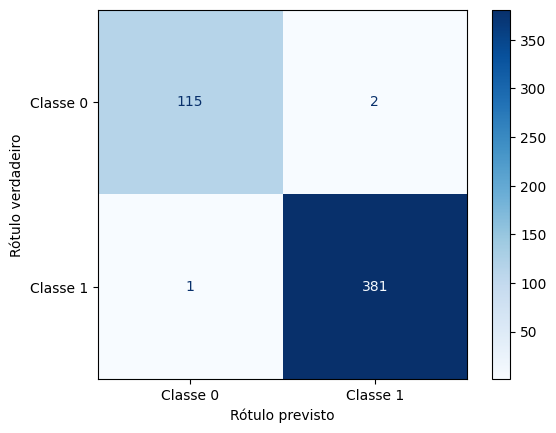

In [79]:
cm = confusion_matrix(y_test, round(y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Classe 0', 'Classe 1'])
disp.plot(cmap=plt.cm.Blues)

plt.xlabel('Rótulo previsto')
plt.ylabel('Rótulo verdadeiro')
plt.show()

Taxa de Falsos Positivos: [0.         0.01709402 1.        ]
Taxa de Verdadeiros Positivos: [0.        0.9973822 1.       ]
Limiares: [inf  1.  0.]
Área sob a curva (AUC-ROC): 0.9901440909294311


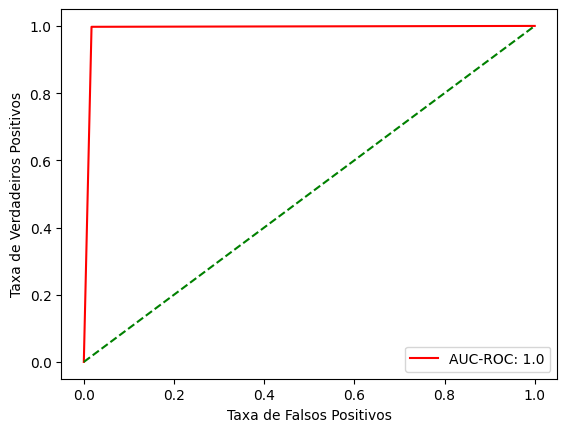

In [80]:
# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, round(y_pred))

# Calculando a área sob a curva ROC (AUC-ROC)
auc = roc_auc_score(y_test, round(y_pred))

print("Taxa de Falsos Positivos:", fpr)
print("Taxa de Verdadeiros Positivos:", tpr)
print("Limiares:", thresholds)
print("Área sob a curva (AUC-ROC):", auc)

# Plotando a curva ROC
plt.plot(fpr, tpr, color='red', label='AUC-ROC: %0.1f' % auc)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc="lower right")
plt.show()